In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from scipy.stats import ttest_ind

This data comes from :
    https://www.kaggle.com/joniarroba/noshowappointments

In [2]:
path = ("https://raw.githubusercontent.com/gurkpet/Thinkful-Lessons/890653404caeea1894d89761cd3032eeade46209/"
"Thinkful%201.5.1%20-%20Narrative%20Analytics%20Capstone/No-show-Issue-Comma-300k.csv")
df = pd.read_csv(path, low_memory = False)

For this experiment we have 2 groups of data, patients who recieved SMS reminders that they have a doctors appointment and patients who did not.  We hypothesize that patients who recieved the SMS reminder will be more likely to show up to their appointment than patients who did not recieve the SMS reminder.

In [3]:
df.head()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,Sms_Reminder,AwaitingTime
0,19,M,2014-12-16T14:46:25Z,2015-01-14T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-29
1,24,F,2015-08-18T07:01:26Z,2015-08-19T00:00:00Z,Wednesday,Show-Up,0,0,0,0,0,0,0,0,-1
2,4,F,2014-02-17T12:53:46Z,2014-02-18T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,0,-1
3,5,M,2014-07-23T17:02:11Z,2014-08-07T00:00:00Z,Thursday,Show-Up,0,0,0,0,0,0,0,1,-15
4,38,M,2015-10-21T15:20:09Z,2015-10-27T00:00:00Z,Tuesday,Show-Up,0,0,0,0,0,0,0,1,-6


In [4]:
df.shape

(300000, 15)

In [5]:
#Check for unique items in Sms_Reminder Column
df['Sms_Reminder'].unique()

array([0, 1, 2], dtype=int64)

In [6]:
#It seems for some reason in the boolean data section for SMS Reminder there are 3 option where there should be 2
#The third option '2' is a relatively small portion of the data, so we can drop it.
df.groupby('Sms_Reminder').count()

,Age,Gender,AppointmentRegistration,ApointmentData,DayOfTheWeek,Status,Diabetes,Alcoolism,HiperTension,Handcap,Smokes,Scholarship,Tuberculosis,AwaitingTime
Sms_Reminder,,,,,,,,,,,,,,
0,128547,128547,128547,128547,128547,128547,128547,128547,128547,128547,128547,128547,128547,128547
1,170654,170654,170654,170654,170654,170654,170654,170654,170654,170654,170654,170654,170654,170654
2,799,799,799,799,799,799,799,799,799,799,799,799,799,799


In [7]:
#drop the data where SMS_reminder equals 2
df = df[df.Sms_Reminder != 2]

In [8]:
#check that we correctly dropped the data we want to drop
df['Sms_Reminder'].unique()

array([0, 1], dtype=int64)

In [9]:
#replace show up with 1, and no show with 0 in the status column
df['Status'] = np.where(df['Status']=='Show-Up', 1, 0)

In [10]:
#Check the data to make sure we converted the Show Up and No-show data to 1s and 0s.
df.Status.unique()

array([1, 0], dtype=int64)

<h1> 1 of 3: p-value off of boolean data<h1>

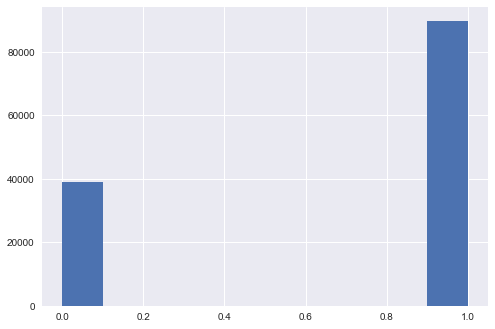

In [11]:
plt.hist(df[df.Sms_Reminder == 0].Status)
plt.show()

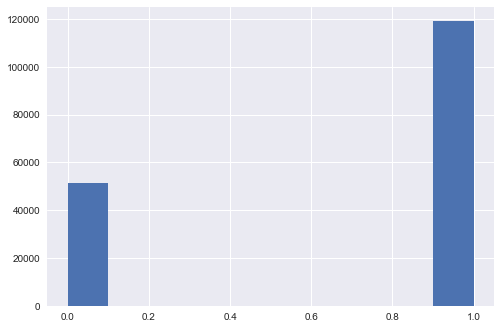

In [12]:
plt.hist(df[df.Sms_Reminder == 1].Status)
plt.show()

In [13]:
print('Control Sample Size:', len(df[df.Sms_Reminder == 0]))
print('Test Sample Size:', len(df[df.Sms_Reminder == 1]))
print('Rate of people who didnt get SMS but showed up:', df[df.Sms_Reminder == 0].Status.mean())
print('Rate of people who did get SMS but showed up:', df[df.Sms_Reminder == 1].Status.mean())
print('Ttest:', ttest_ind(df[df.Sms_Reminder == 0].Status, df[df.Sms_Reminder == 1].Status))

Control Sample Size: 128547
Test Sample Size: 170654
Rate of people who didnt get SMS but showed up: 0.697270259127
Rate of people who did get SMS but showed up: 0.697938518874
Ttest: Ttest_indResult(statistic=-0.393983868910256, pvalue=0.6935932295794931)


Am I not done at this point? 

I know we went over this but I reviewed the guided example here:
https://courses.thinkful.com/data-201v1/assignment/1.4.9

And it seems like I have done exactly the same thing that they did in the guided example.  Below I try to break the data into individual days of the month 1-31, then dropping the 31st because it causes outlier data as only half of months have 31 days.

<h1> 2 of 3: p-value off of 30 days<h1>

In [14]:
#create a dataframe that only contains the relavent data
df2 = df[['ApointmentData', 'Status','Sms_Reminder']]

In [15]:
#create a column that corresponds to the day of the month that the appointment was set for
df2['Day_of_month'] = df2['ApointmentData'].str[8] + df2['ApointmentData'].str[9]


c:\users\peter\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [16]:
df2.head()

,ApointmentData,Status,Sms_Reminder,Day_of_month
0,2015-01-14T00:00:00Z,1,0,14
1,2015-08-19T00:00:00Z,1,0,19
2,2014-02-18T00:00:00Z,1,0,18
3,2014-08-07T00:00:00Z,1,1,07
4,2015-10-27T00:00:00Z,1,1,27


Is there some easy way to surpress these errors?  Or should I be more aware of something that the errors are trying to indicate.

In [17]:
#I used Appointment Data to split my data into 30 (31 so far, soon to be 30) time slices based off days of the month.
#So I no longer need this column for anything.
del df2['ApointmentData']

In [18]:
#split my data into test and control
control = df2[df2['Sms_Reminder']==0]
test = df2[df2['Sms_Reminder']==1]

In [19]:
#I dont need the Sms_Reminder column anymore because my data is split based on this parameter
del test['Sms_Reminder']
del control['Sms_Reminder']

In [20]:
test = test.groupby('Day_of_month').mean()

In [21]:
control = control.groupby('Day_of_month').mean()

In [22]:
test.tail()

,Status
Day_of_month,
27,0.702690
28,0.696933
29,0.638269
30,0.652783
31,0.712814


In [23]:
#remove the 31st day of the month because not all months have 31 days so it creates bias.
test = test.ix[0:30]
control = control.ix[0:30]

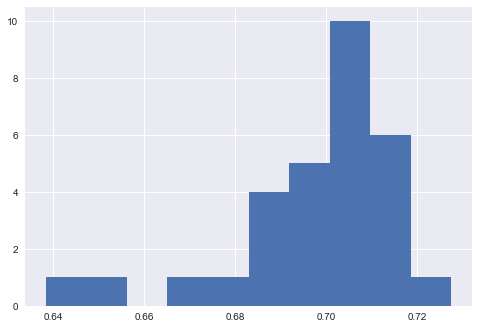

In [24]:
plt.hist(test['Status'])
plt.show()

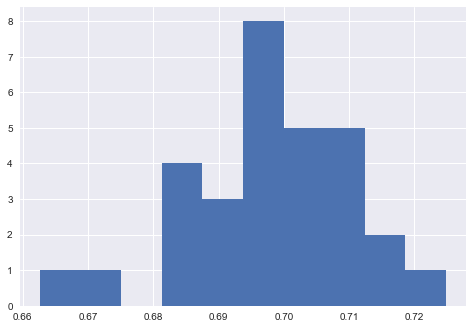

In [25]:
plt.hist(control['Status'])
plt.show()

In [26]:
ttest_ind(control['Status'], test['Status'])

Ttest_indResult(statistic=0.08107094194753707, pvalue=0.93566464365546531)

So this would seem to indicate that the data from the two groups is near identical so that we can say for sure, SMS_reminders have almost no impact on patients coming to their appointments.

<h1> 3 of 3: p-value off of 7 day weeks<h1>

In [27]:
week_df = df[['DayOfTheWeek', 'Status', 'Sms_Reminder']]

In [28]:
week_test = week_df[week_df['Sms_Reminder']==1]
week_control = week_df[week_df['Sms_Reminder']==0]

In [29]:
week_test_gp = week_test.groupby('DayOfTheWeek').mean()
week_control_gp = week_control.groupby('DayOfTheWeek').mean()

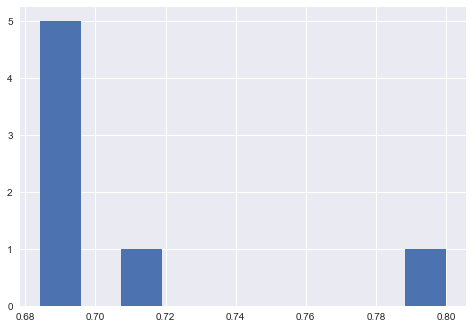

In [30]:
plt.hist(week_test_gp.Status)
plt.show()

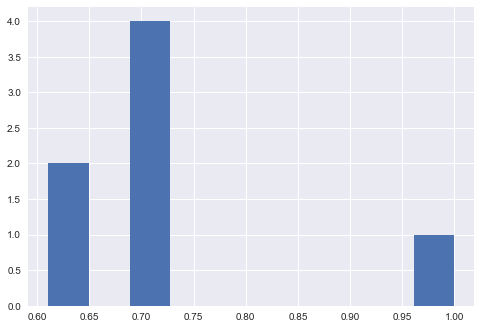

In [31]:
plt.hist(week_control_gp.Status)
plt.show()

In [32]:
ttest_ind(week_test_gp.Status, week_control_gp.Status)

Ttest_indResult(statistic=-0.31063176614155802, pvalue=0.76140983844275634)